In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Load Training Data

In [14]:
df_train = pd.read_csv('../dataset/sign_mnist_train/sign_mnist_train.csv')
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [37]:
Y = df_train['label']
X = df_train.drop(["label"], axis=1)

# Load Testing Data

In [16]:
df_test = pd.read_csv('../dataset/sign_mnist_test/sign_mnist_test.csv')
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [17]:
test_Y = df_test['label']
test_X = df_test.drop(['label'], axis=1)

# Decision Tree Loop

In [40]:
testAcc = np.zeros(5)
testF1 = np.zeros(5)
trainAcc = np.zeros(5)
trainF1 = np.zeros(5)
validAcc = np.zeros(5)
validF1 = np.zeros(5)
counts = [1, 5, 10, 20, 30]

index = 0
for i in counts:
    train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.1)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_X, train_Y)
    Y_predTrain = clf.predict(train_X)
    Y_predValid = clf.predict(valid_X)
    Y_predTest = clf.predict(test_X)
    testAcc[index] = accuracy_score(test_Y, Y_predTest)
    testF1[index] = f1_score(test_Y, Y_predTest, average='weighted')
    validAcc[index] = accuracy_score(valid_Y, Y_predValid)
    validF1[index] = f1_score(valid_Y, Y_predValid, average='weighted')
    trainAcc[index] = accuracy_score(train_Y, Y_predTrain)
    trainF1[index] = f1_score(train_Y, Y_predTrain, average='weighted')
    index += 1

# Plotting Accuracy Scores

Text(0, 0.5, 'Accuracy')

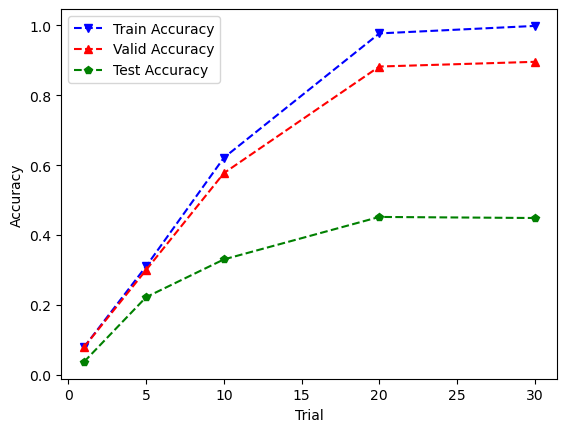

In [41]:
plt.plot([1,5,10,20,30],trainAcc,'bv--')
plt.plot([1,5,10,20,30],validAcc,'r^--')
plt.plot([1,5,10,20,30],testAcc,'gp--')
plt.legend(['Train Accuracy', 'Valid Accuracy' ,'Test Accuracy'])
plt.xlabel('Trial')
plt.ylabel('Accuracy')

In [42]:
trainAcc, validAcc, testAcc

(array([0.07855437, 0.31045368, 0.62131207, 0.97721478, 0.99862398]),
 array([0.07865987, 0.30007283, 0.5772032 , 0.88237436, 0.89584851]),
 array([0.03667038, 0.22211378, 0.33017289, 0.45175683, 0.44868935]))

# Plotting F1 Scores

Text(0, 0.5, 'F1 Score')

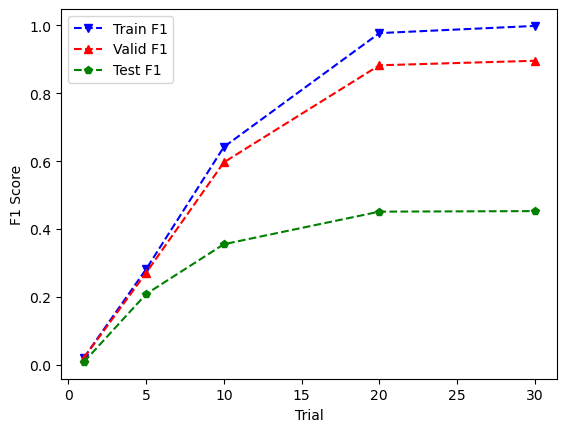

In [43]:
plt.plot([1,5,10,20,30],trainF1,'bv--')
plt.plot([1,5,10,20,30],validF1,'r^--')
plt.plot([1,5,10,20,30],testF1,'gp--')
plt.legend(['Train F1', 'Valid F1', 'Test F1'])
plt.xlabel('Trial')
plt.ylabel('F1 Score')

In [44]:
trainF1, validF1, testF1

(array([0.02097852, 0.28189778, 0.64198923, 0.97747394, 0.99863053]),
 array([0.02062968, 0.27109668, 0.59673095, 0.8826494 , 0.89593636]),
 array([0.00847104, 0.20860486, 0.35537224, 0.45131468, 0.45293396]))

## At a tree depth of around 20, the accuracy and F1 scores begin the flatten out across the training, validation and test cases